<h2>Dataset Link</h2>

https://www.kaggle.com/datasets/cpluzshrijayan/milkquality/data

<h2>Data Preprocessing</h2>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Dataset/milknew.csv')
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [3]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [5]:
df.nunique()

pH            16
Temprature    17
Taste          2
Odor           2
Fat            2
Turbidity      2
Colour         9
Grade          3
dtype: int64

In [6]:
df['Colour'].unique()

array([254, 253, 246, 255, 250, 247, 245, 240, 248], dtype=int64)

In [7]:
df['Grade'].unique()

array(['high', 'low', 'medium'], dtype=object)

In [8]:
df['Grade'].value_counts()

Grade
low       429
medium    374
high      256
Name: count, dtype: int64

<h2>EDA</h2>

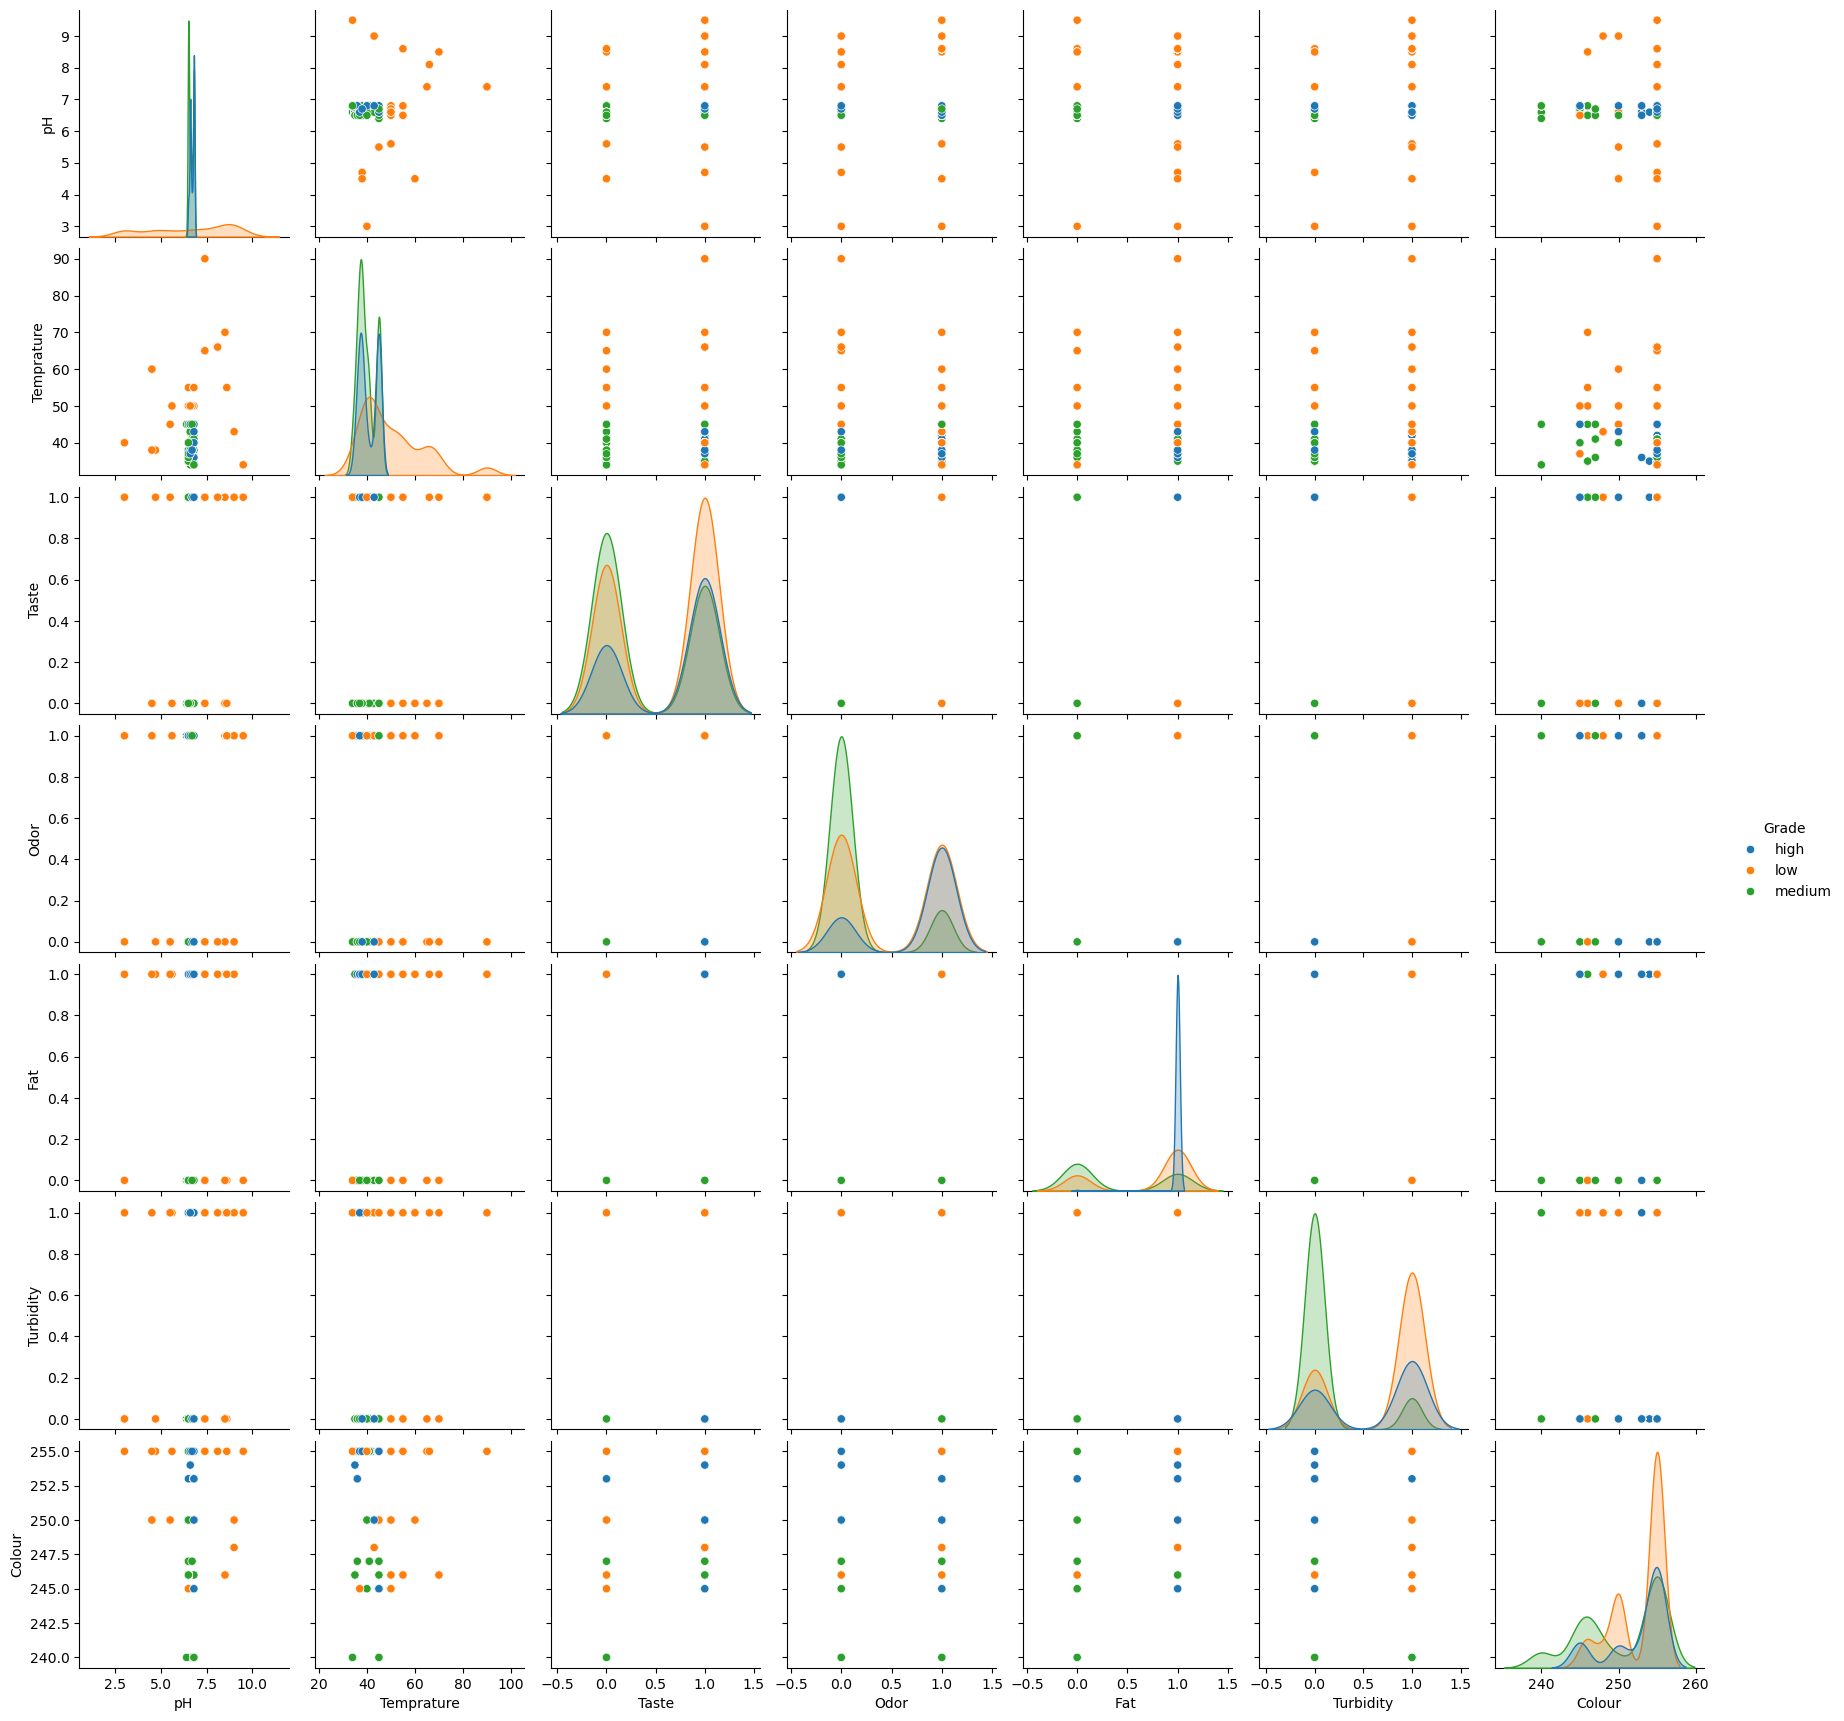

In [9]:
sns.pairplot(df, hue='Grade')

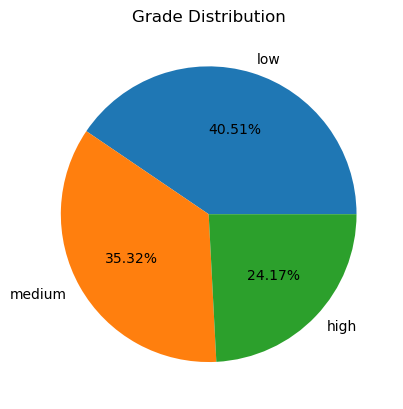

In [10]:
plt.pie(df['Grade'].value_counts(), labels=df['Grade'].value_counts().index, autopct='%1.2f%%')
plt.title('Grade Distribution')
plt.show();

In [11]:
x = df.drop('Grade', axis=1)
y = df['Grade']

In [12]:
le = LabelEncoder()
y = le.fit_transform(y)

label_mapping = dict(zip(le.classes_, range(len(le.classes_))))
label_mapping

{'high': 0, 'low': 1, 'medium': 2}

In [13]:
df2 = x.copy()
df2['Grade'] = y

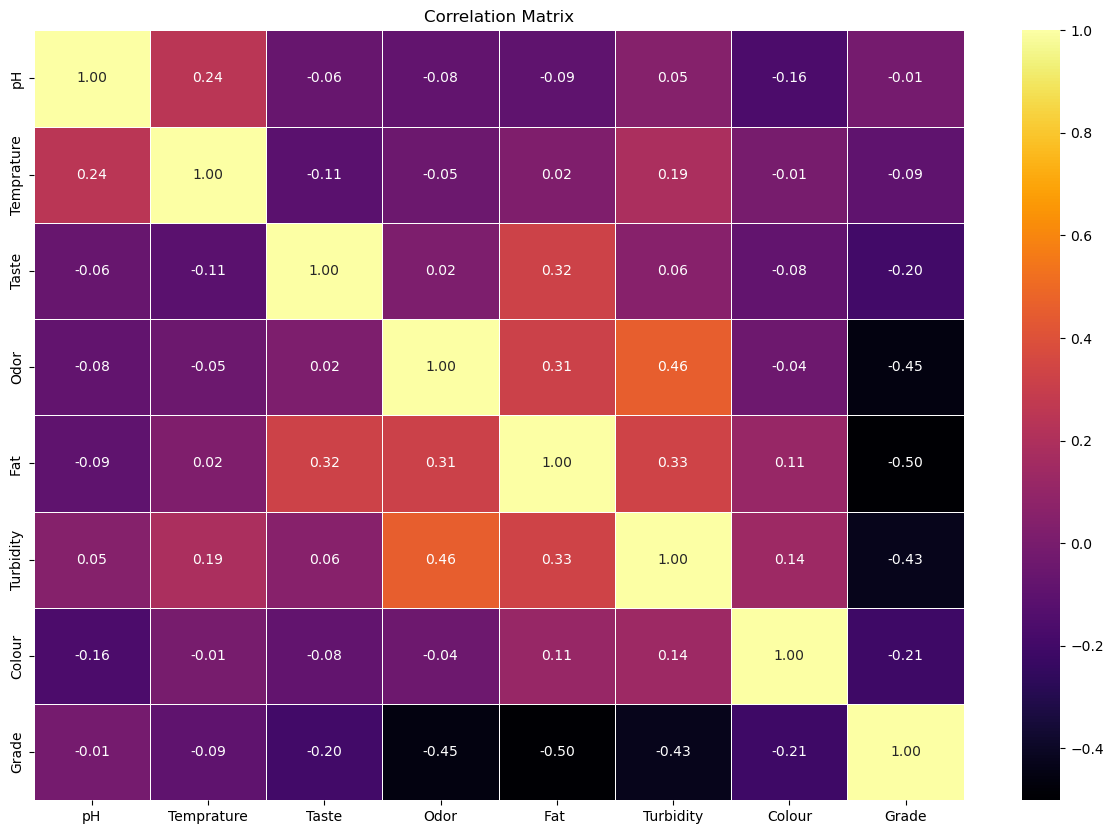

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(numeric_only=True), annot=True, cmap="inferno", fmt='.2f', linewidth=0.5)
plt.title('Correlation Matrix')
plt.show();

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

<h2>Machine Learning</h2>

In [16]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
acc_train = knn.score(x_train, y_train)

# Make predictions
y_pred = knn.predict(x_test)
acc_test = accuracy_score(y_test, y_pred)
print(f'KNN Train Accuracy: {acc_train:.4f}')
print(f'KNN Test Accuracy: {acc_test:.4f}')

KNN Train Accuracy: 0.9988
KNN Test Accuracy: 0.9906


In [17]:
cr_ML = classification_report(y_test, y_pred, target_names=le.classes_)
print(cr_ML)

              precision    recall  f1-score   support

        high       0.98      1.00      0.99        48
         low       1.00      0.97      0.99        78
      medium       0.99      1.00      0.99        86

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212



In [18]:
cm_ML = confusion_matrix(y_test, y_pred)
print(cm_ML)

[[48  0  0]
 [ 1 76  1]
 [ 0  0 86]]


<h2>Deep Learning</h2>

In [19]:
DL_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(80, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
DL_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = DL_model.fit(x_train, y_train, epochs=50, batch_size=16, validation_data=(x_test, y_test), callbacks=[EarlyStopping(patience=5)])

Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - accuracy: 0.4984 - loss: 1.2804 - val_accuracy: 0.8349 - val_loss: 0.3597
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7926 - loss: 0.4624 - val_accuracy: 0.9198 - val_loss: 0.2516
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8364 - loss: 0.3524 - val_accuracy: 0.9057 - val_loss: 0.2202
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8850 - loss: 0.2718 - val_accuracy: 0.9057 - val_loss: 0.2023
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9160 - loss: 0.2390 - val_accuracy: 0.9151 - val_loss: 0.1774
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9162 - loss: 0.2055 - val_accuracy: 0.9151 - val_loss: 0.1697
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9079 - loss: 0.2055 - val_accuracy: 0.9245 - val_loss: 0.1682
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9256 - loss: 0.1761 - val_accuracy: 0.9387 - 

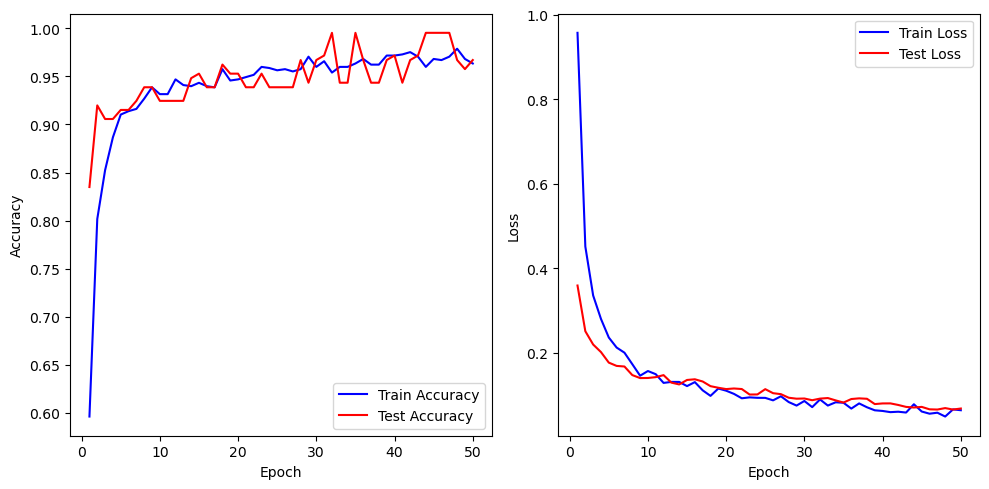

In [20]:
# learning curve
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
# creating subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(epochs, acc, 'b', label='Train Accuracy')
axes[0].plot(epochs, val_acc, 'r', label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

# adusting layout for better spacing
plt.tight_layout()

# display the figure
plt.show();

In [21]:
pred = DL_model.predict(x_test)
y_pred = np.argmax(pred, axis=1)

print("Test Accuracy:", accuracy_score(y_test, y_pred))    
print(classification_report(y_test, y_pred, target_names=le.classes_))
print(confusion_matrix(y_test, y_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Test Accuracy: 0.9669811320754716
              precision    recall  f1-score   support

        high       0.87      1.00      0.93        48
         low       1.00      0.99      0.99        78
      medium       1.00      0.93      0.96        86

    accuracy                           0.97       212
   macro avg       0.96      0.97      0.96       212
weighted avg       0.97      0.97      0.97       212

[[48  0  0]
 [ 1 77  0]
 [ 6  0 80]]


<h2>ML vs DL</h2>

In [22]:
new_df = [[6.6, 37, 1, 0, 1, 0, 255]]
scaled_df = sc.transform(new_df)

ML_pred = knn.predict(scaled_df)
ori_class = le.inverse_transform(ML_pred)

y_pred = DL_model.predict(scaled_df)
DL_pred = np.argmax(y_pred, axis=1)

print("ML Prediction: ", ori_class[0])
print("DL Prediction:", le.inverse_transform(DL_pred)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
ML Prediction:  high
DL Prediction: high
